This notebook makes an island taking the original bathy_meter.nc and makes two square island of the given rimwidth at the NW and SW edges

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from salishsea_tools import (nc_tools, gsw_calls, viz_tools)

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
bathy_file = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc');


In [3]:
bathy = bathy_file.variables['Bathymetry'][:];
lon = bathy_file.variables['nav_lon'][:];
lat = bathy_file.variables['nav_lat'][:];
bathy.shape

(100, 70)

In [4]:
bathy

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 0.0)

In [5]:
bathy[0:4,0:4] = 0.0;
bathy[-4:,0:4] = 0.0;

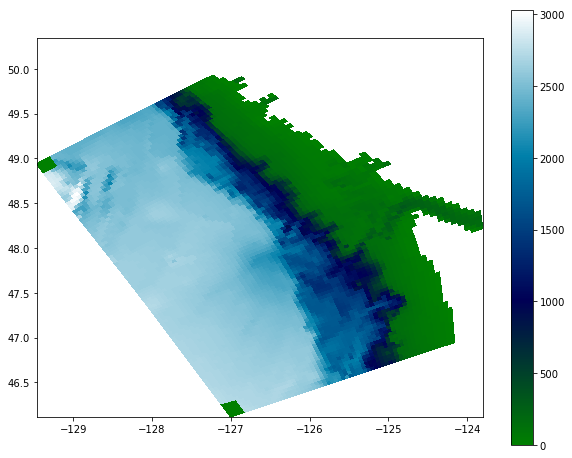

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(lon, lat, bathy, cmap =cm.ocean)
fig.colorbar(mesh)
plt.show()

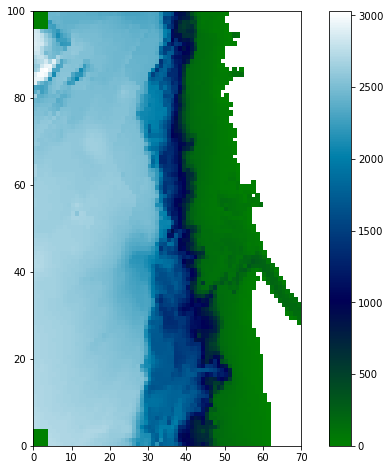

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(bathy, cmap =cm.ocean)
fig.colorbar(mesh)
plt.show()

In [8]:
bathy[0,1]

0.0

In [9]:
def writebathy(filename,glamt,gphit,bathy):

    bnc = nc.Dataset(filename, 'w', clobber=True)
    NY,NX = glamt.shape

    # Create the dimensions
    bnc.createDimension('x', NX)
    bnc.createDimension('y', NY)

    bnc.createVariable('nav_lon', 'f', ('y', 'x'), zlib=True, complevel=4)
    bnc.variables['nav_lon'].setncattr('units', 'degrees_east')

    bnc.createVariable('nav_lat', 'f', ('y', 'x'), zlib=True, complevel=4)
    bnc.variables['nav_lat'].setncattr('units', 'degrees_north')

    bnc.createVariable('Bathymetry', 'd', ('y', 'x'), zlib=True, complevel=4, fill_value=0)
    bnc.variables['Bathymetry'].setncattr('units', 'metres')

    bnc.variables['nav_lon'][:] = glamt
    bnc.variables['nav_lat'][:] = gphit
    bnc.variables['Bathymetry'][:] = bathy

    bnc.close()

In [10]:
# Write Bathymetry to NetCDF file
writebathy('/ocean/ssahu/CANYONS/wcvi/grid/bathy_files/island_bathy_meter.nc',lon,lat,bathy)

### Copy this file to wcvi/grid and rename it as bathy_meter.nc to give a run using island bathy. A copy of the original bathy is retained in the bathy_files subdirectory in wcvi/grid

#### From the plots in Westcoastattempt38 we find that the way NEMO reads the files are switched the other way around for the east and the west files

In [11]:
### Let us load the boundary files of the west and east files

west_bdy_sal = nc.Dataset('/ocean/ssahu/CANYONS/bdy_files/3d_NEMO_west_m04.nc').variables['vosaline'][:];
west_bdy_temp = nc.Dataset('/ocean/ssahu/CANYONS/bdy_files/3d_NEMO_west_m04.nc').variables['votemper'][:];

In [12]:
west_bdy_sal.shape

(43, 27, 4, 100)

In [13]:
west_bdy_sal[0,0,:,0]

array([ 32.62799835,  32.61299896,  32.61199951,  32.61945343], dtype=float32)

In [14]:
west_bdy_sal = west_bdy_sal[:,:,::-1,:]; #### we have done this while writing the file in the final notebook (where vertical interepolation is also done)

In [15]:
west_bdy_sal[0,0,:,0]

array([ 32.61945343,  32.61199951,  32.61299896,  32.62799835], dtype=float32)

In [32]:
west_bdy_sal.shape

(43, 27, 4, 100)

In [16]:
#### just checking on the depth averaged bc

baro_west_ssh = nc.Dataset('/ocean/ssahu/CANYONS/bdy_files/2d_west_m04.nc').variables['sossheig'][:];

In [18]:
baro_west_ssh.shape

(43, 4, 100)

In [19]:
baro_west_ssh[0,:,0]

array([ 0.0687754 ,  0.07433251,  0.07874788,  0.0819409 ], dtype=float32)

In [20]:
#### We need to switch this too

baro_west_ssh = baro_west_ssh[:,::-1,:];

baro_west_ssh.shape

(43, 4, 100)

In [21]:
baro_west_ssh[0,:,0]

array([ 0.0819409 ,  0.07874788,  0.07433251,  0.0687754 ], dtype=float32)